## 目录
- 1.相关图
- 2.矩阵图
- 3.发散型条形图
- 4.发散型文本
- 5.发散型包点图
- 6.带标记的发散型棒棒糖图 7有序条形图
- 8.棒棒糖图
- 9.包点图
- 1.0坡度图

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

# 解决 plt 中文显示的问题 mymac
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
# 忽略版本问题
import warnings
warnings.filterwarnings("ignore")  

# Version
print(mpl.__version__)  #> 3.0.0
print(sns.__version__)  #> 0.9.0

3.3.3
0.11.0


## 相关图
Correlogram用于直观地查看给定数据帧（或2D数组）中所有可能的数值变量对之间的相关度量。

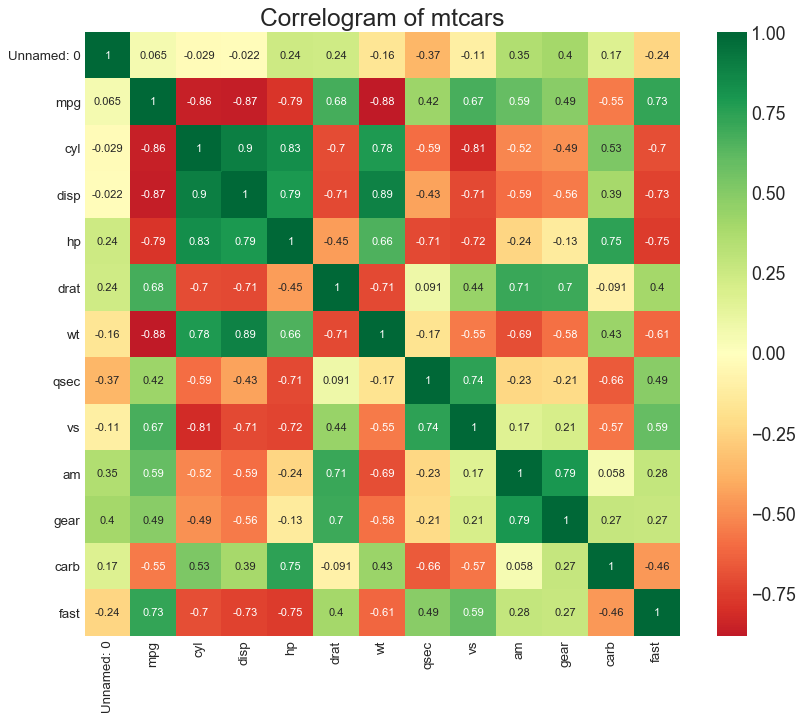

In [2]:
# Import Dataset
# df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
df = pd.read_csv('data/mtcars.csv')
# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)
# Decorations
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## 矩阵图
成对图是探索性分析中的最爱，以理解所有可能的数字变量对之间的关系。它是双变量分析的必备工具。

<Figure size 800x640 with 0 Axes>

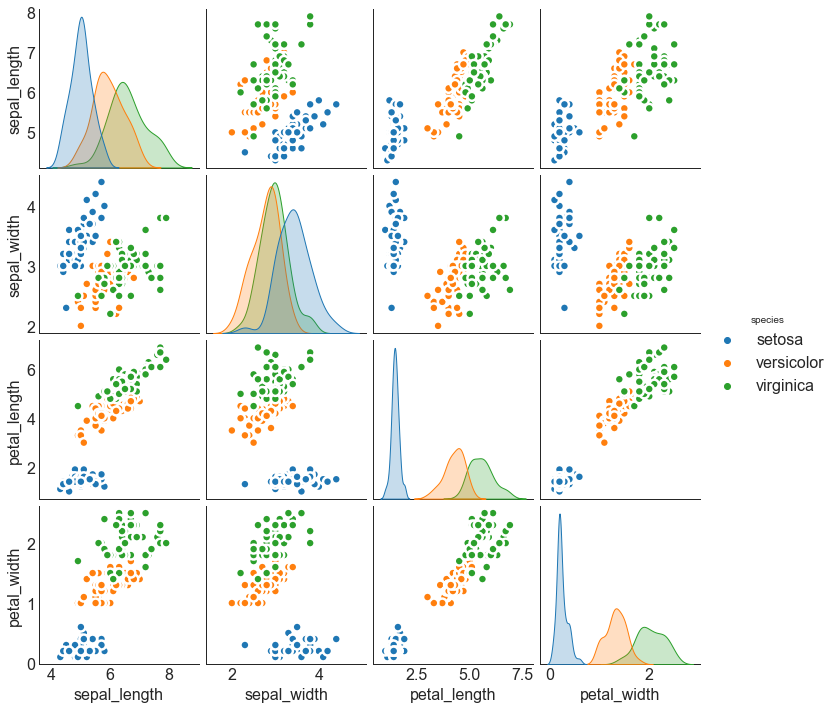

In [3]:
# Load Dataset
df = sns.load_dataset('iris')
# Plot
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df, kind="scatter", hue="species", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

<Figure size 800x640 with 0 Axes>

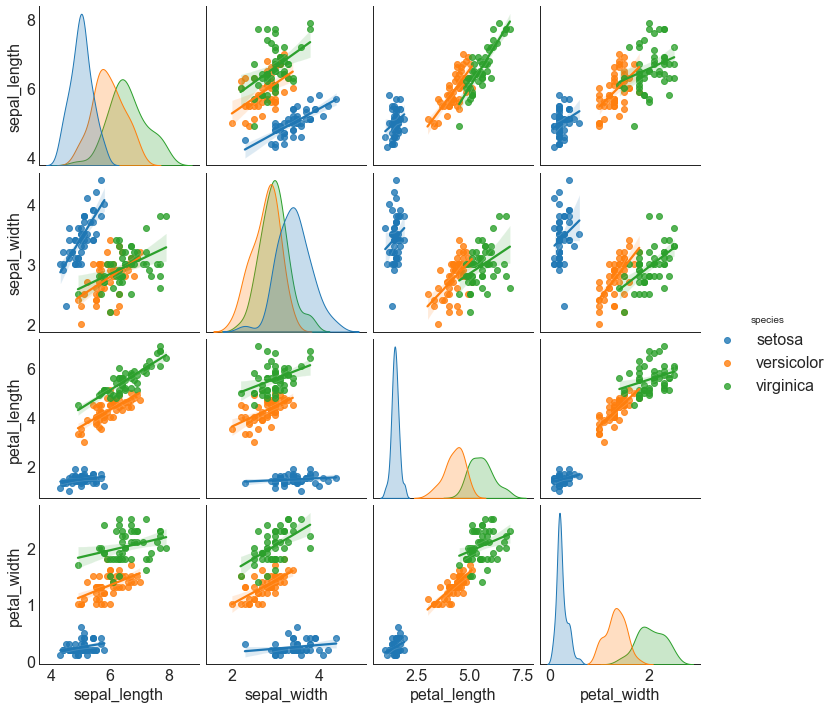

In [4]:
# Load Dataset
df = sns.load_dataset('iris')
# Plot
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df, kind="reg", hue="species")
plt.show()

## 发散型条形图
如果您想根据单个指标查看项目的变化情况，并可视化此差异的顺序和数量，那么发散条是一个很好的工具。它有助于快速区分数据中组的性能，并且非常直观，并且可以立即传达这一点。

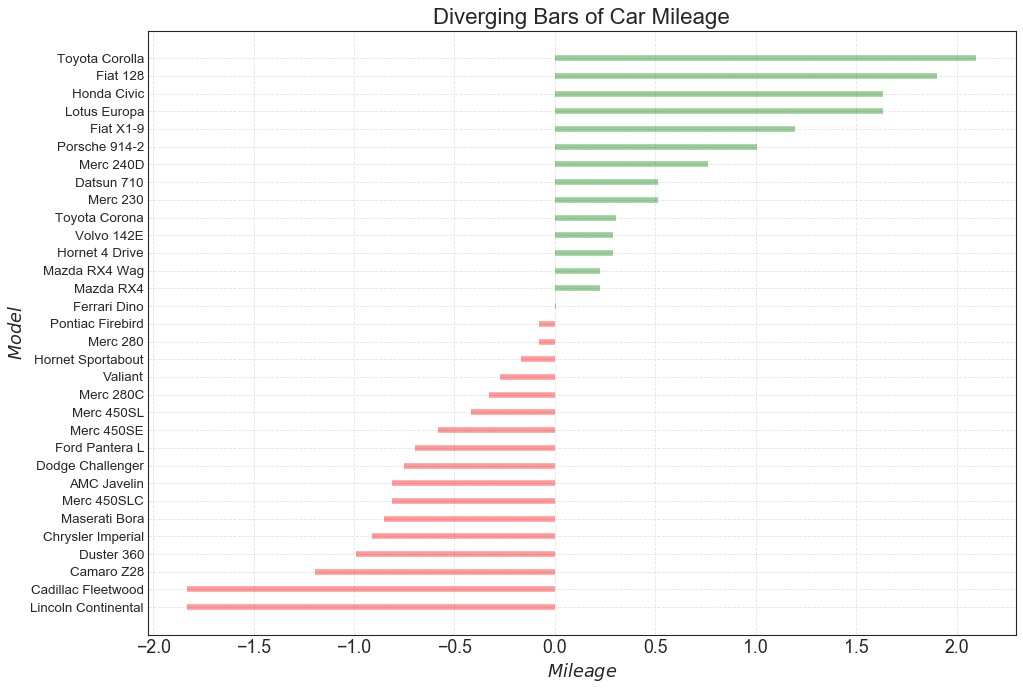

In [5]:
# Prepare Data
df = pd.read_csv("data/mtcars.csv")
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean())/x.std()
df['colors'] = ['red' if x < 0 else 'green' for x in df['mpg_z']]
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)
# Draw plot
plt.figure(figsize=(14,10), dpi= 80)
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z, color=df.colors, alpha=0.4, linewidth=5)
# Decorations
plt.gca().set(ylabel='$Model$', xlabel='$Mileage$')
plt.yticks(df.index, df.cars, fontsize=12)
plt.title('Diverging Bars of Car Mileage', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.show()

## 发散型文本
分散的文本类似于发散条，如果你想以一种漂亮和可呈现的方式显示图表中每个项目的价值，它更喜欢。

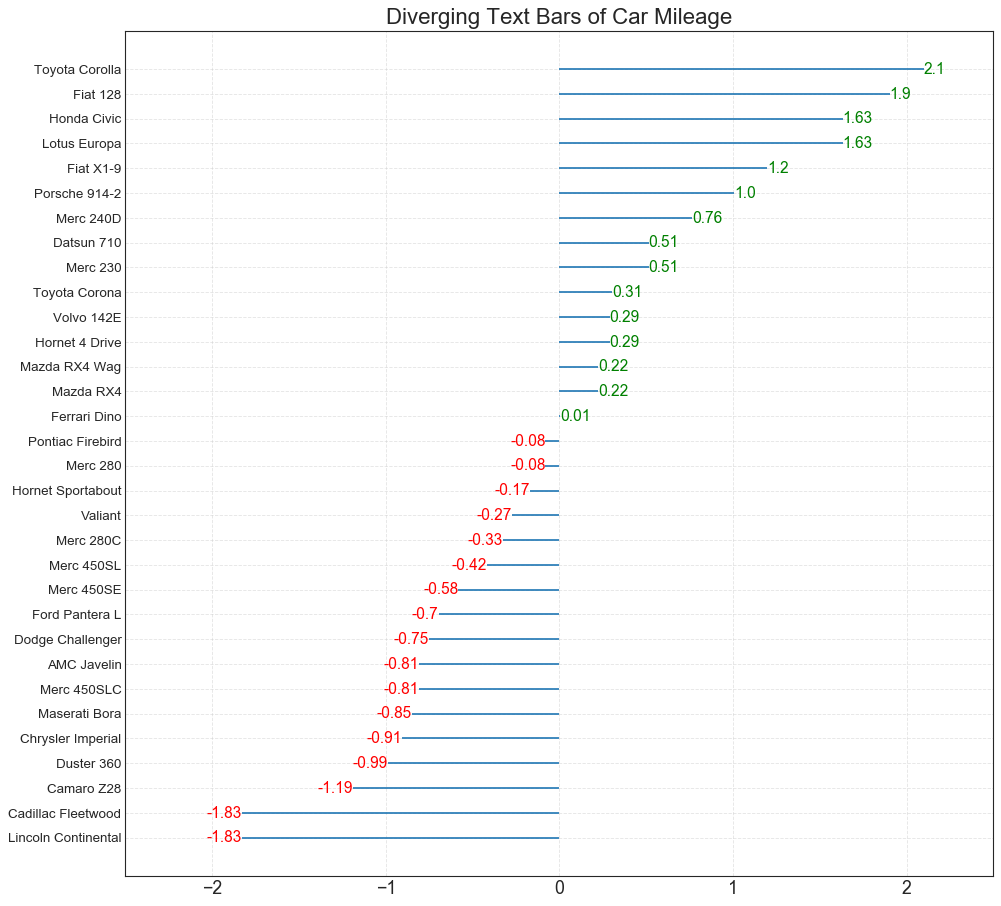

In [6]:
# Prepare Data
df = pd.read_csv("data/mtcars.csv")
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean())/x.std()
df['colors'] = ['red' if x < 0 else 'green' for x in df['mpg_z']]
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)
# Draw plot
plt.figure(figsize=(14,14), dpi= 80)
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z)
for x, y, tex in zip(df.mpg_z, df.index, df.mpg_z):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < 0 else 'left', 
                 verticalalignment='center', fontdict={'color':'red' if x < 0 else 'green', 'size':14})
# Decorations    
plt.yticks(df.index, df.cars, fontsize=12)
plt.title('Diverging Text Bars of Car Mileage', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.xlim(-2.5, 2.5)
plt.show()

## 发散型包点图
发散点图也类似于发散条。然而，与发散条相比，条的不存在减少了组之间的对比度和差异。

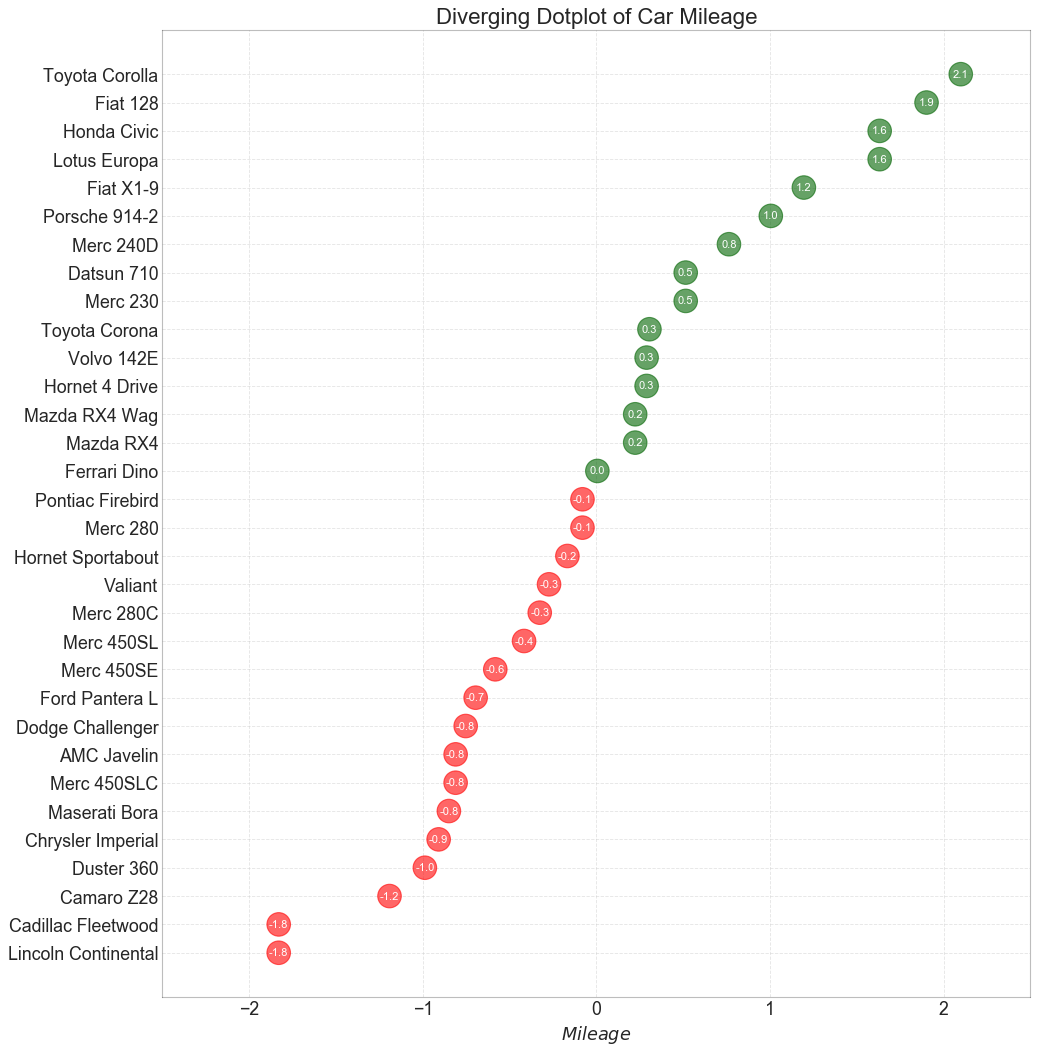

In [7]:
# Prepare Data
df = pd.read_csv("data/mtcars.csv")
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean())/x.std()
df['colors'] = ['red' if x < 0 else 'darkgreen' for x in df['mpg_z']]
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)
# Draw plot
plt.figure(figsize=(14,16), dpi= 80)
plt.scatter(df.mpg_z, df.index, s=450, alpha=.6, color=df.colors)
for x, y, tex in zip(df.mpg_z, df.index, df.mpg_z):
    t = plt.text(x, y, round(tex, 1), horizontalalignment='center', 
                 verticalalignment='center', fontdict={'color':'white'})
# Decorations
# Lighten borders
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)
plt.yticks(df.index, df.cars)
plt.title('Diverging Dotplot of Car Mileage', fontdict={'size':20})
plt.xlabel('$Mileage$')
plt.grid(linestyle='--', alpha=0.5)
plt.xlim(-2.5, 2.5)
plt.show()

## 带标记的发散型棒棒糖图
带标记的棒棒糖通过强调您想要引起注意的任何重要数据点并在图表中适当地给出推理，提供了一种可视化分歧的灵活方式。

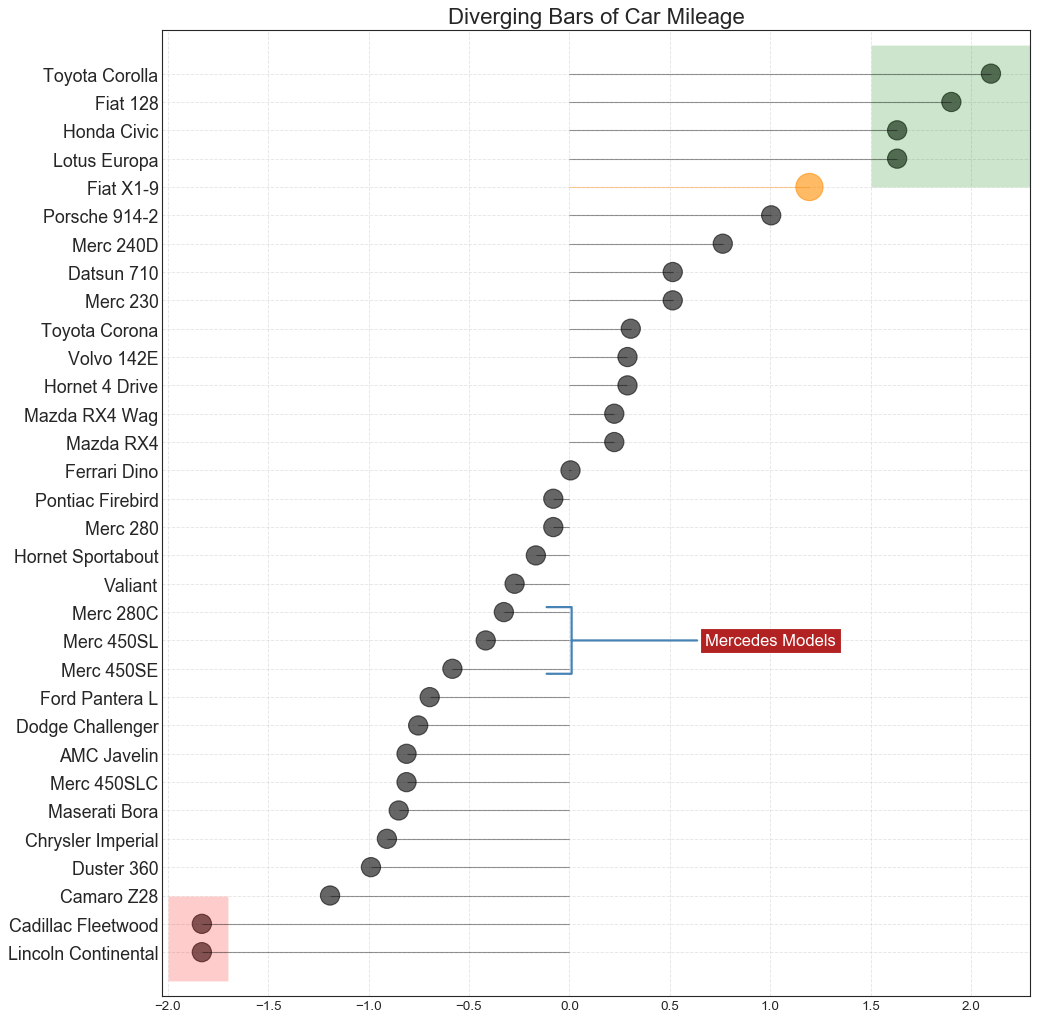

In [8]:
# Prepare Data
df = pd.read_csv("data/mtcars.csv")
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean())/x.std()
df['colors'] = 'black'
# color fiat differently
df.loc[df.cars == 'Fiat X1-9', 'colors'] = 'darkorange'
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)
# Draw plot
import matplotlib.patches as patches
plt.figure(figsize=(14,16), dpi= 80)
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z, color=df.colors, alpha=0.4, linewidth=1)
plt.scatter(df.mpg_z, df.index, color=df.colors, s=[600 if x == 'Fiat X1-9' else 300 for x in df.cars], alpha=0.6)
plt.yticks(df.index, df.cars)
plt.xticks(fontsize=12)
# Annotate
plt.annotate('Mercedes Models', xy=(0.0, 11.0), xytext=(1.0, 11), xycoords='data', 
            fontsize=15, ha='center', va='center',
            bbox=dict(boxstyle='square', fc='firebrick'),
            arrowprops=dict(arrowstyle='-[, widthB=2.0, lengthB=1.5', lw=2.0, color='steelblue'), color='white')
# Add Patches
p1 = patches.Rectangle((-2.0, -1), width=.3, height=3, alpha=.2, facecolor='red')
p2 = patches.Rectangle((1.5, 27), width=.8, height=5, alpha=.2, facecolor='green')
plt.gca().add_patch(p1)
plt.gca().add_patch(p2)
# Decorate
plt.title('Diverging Bars of Car Mileage', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.show()

## 有序条形图
有序条形图有效地传达了项目的排名顺序。但是，在图表上方添加度量标准的值，用户可以从图表本身获取精确信息。

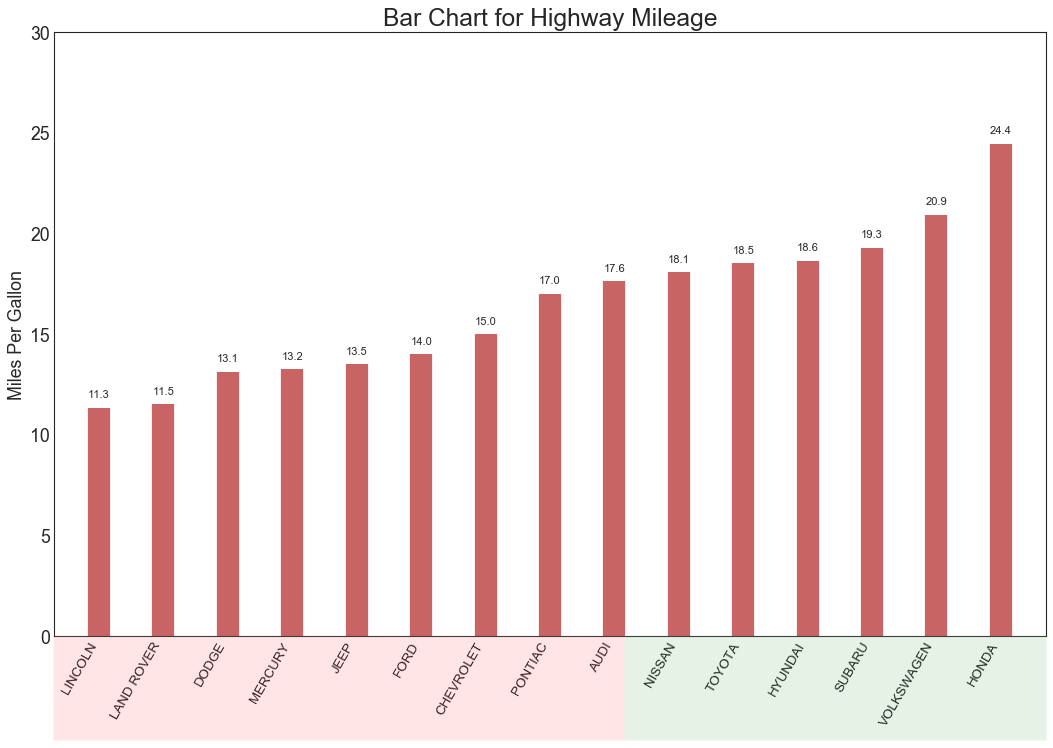

In [9]:
# Prepare Data
df_raw = pd.read_csv("data/mpg_ggplot2.csv")
df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
df.sort_values('cty', inplace=True)
df.reset_index(inplace=True)
# Draw plot
import matplotlib.patches as patches
fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi= 80)
ax.vlines(x=df.index, ymin=0, ymax=df.cty, color='firebrick', alpha=0.7, linewidth=20)
# Annotate Text
for i, cty in enumerate(df.cty):
    ax.text(i, cty+0.5, round(cty, 1), horizontalalignment='center')
# Title, Label, Ticks and Ylim
ax.set_title('Bar Chart for Highway Mileage', fontdict={'size':22})
ax.set(ylabel='Miles Per Gallon', ylim=(0, 30))
plt.xticks(df.index, df.manufacturer.str.upper(), rotation=60, horizontalalignment='right', fontsize=12)
# Add patches to color the X axis labels
p1 = patches.Rectangle((.57, -0.005), width=.33, height=.13, alpha=.1, facecolor='green', transform=fig.transFigure)
p2 = patches.Rectangle((.124, -0.005), width=.446, height=.13, alpha=.1, facecolor='red', transform=fig.transFigure)
fig.add_artist(p1)
fig.add_artist(p2)
plt.show()

## 棒棒糖图
棒棒糖图表以一种视觉上令人愉悦的方式提供与有序条形图类似的目的。

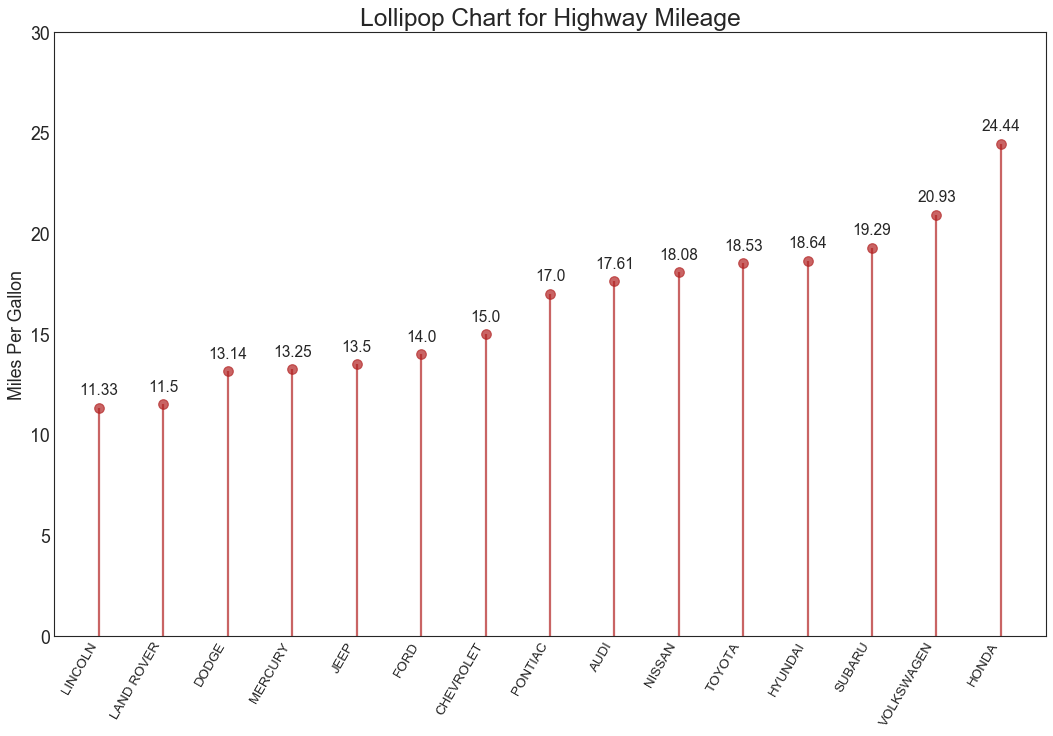

In [10]:
# Prepare Data
df_raw = pd.read_csv("data/mpg_ggplot2.csv")
df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
df.sort_values('cty', inplace=True)
df.reset_index(inplace=True)
# Draw plot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.vlines(x=df.index, ymin=0, ymax=df.cty, color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=df.index, y=df.cty, s=75, color='firebrick', alpha=0.7)
# Title, Label, Ticks and Ylim
ax.set_title('Lollipop Chart for Highway Mileage', fontdict={'size':22})
ax.set_ylabel('Miles Per Gallon')
ax.set_xticks(df.index)
ax.set_xticklabels(df.manufacturer.str.upper(), rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
ax.set_ylim(0, 30)
# Annotate
for row in df.itertuples():
    ax.text(row.Index, row.cty+.5, s=round(row.cty, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)
plt.show()

## 包点图
点图表传达了项目的排名顺序。由于它沿水平轴对齐，因此您可以更容易地看到点彼此之间的距离。

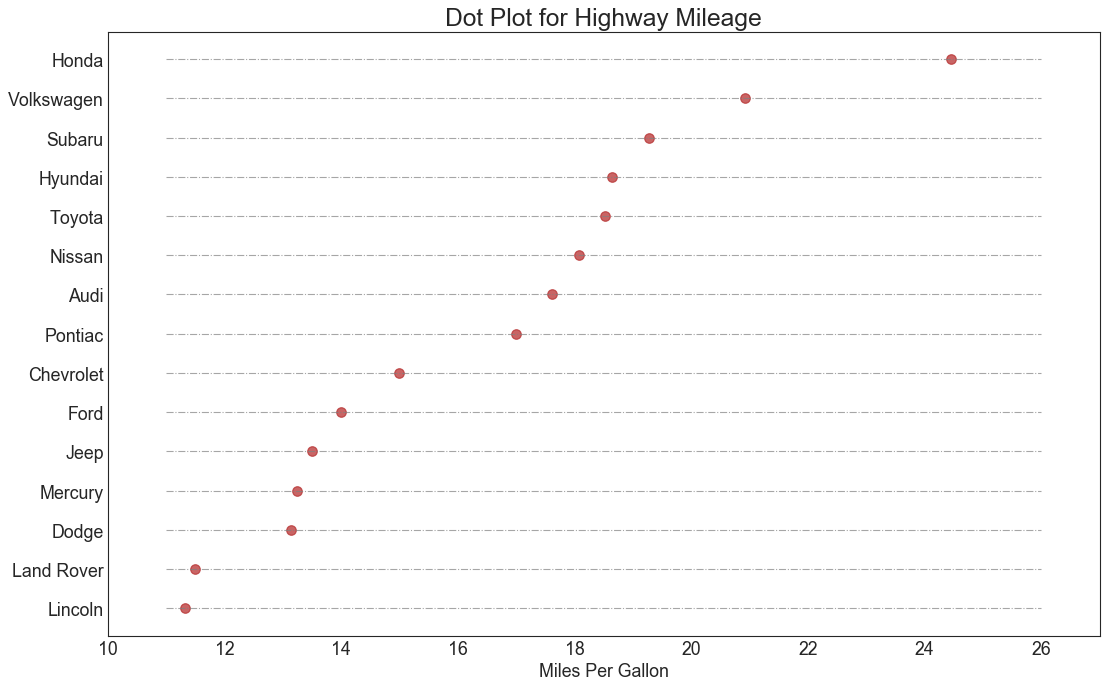

In [11]:
# Prepare Data
df_raw = pd.read_csv("data/mpg_ggplot2.csv")
df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
df.sort_values('cty', inplace=True)
df.reset_index(inplace=True)
# Draw plot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.hlines(y=df.index, xmin=11, xmax=26, color='gray', alpha=0.7, linewidth=1, linestyles='dashdot')
ax.scatter(y=df.index, x=df.cty, s=75, color='firebrick', alpha=0.7)
# Title, Label, Ticks and Ylim
ax.set_title('Dot Plot for Highway Mileage', fontdict={'size':22})
ax.set_xlabel('Miles Per Gallon')
ax.set_yticks(df.index)
ax.set_yticklabels(df.manufacturer.str.title(), fontdict={'horizontalalignment': 'right'})
ax.set_xlim(10, 27)
plt.show()

## 坡度图
斜率图最适合比较给定人/项目的“之前”和“之后”位置。

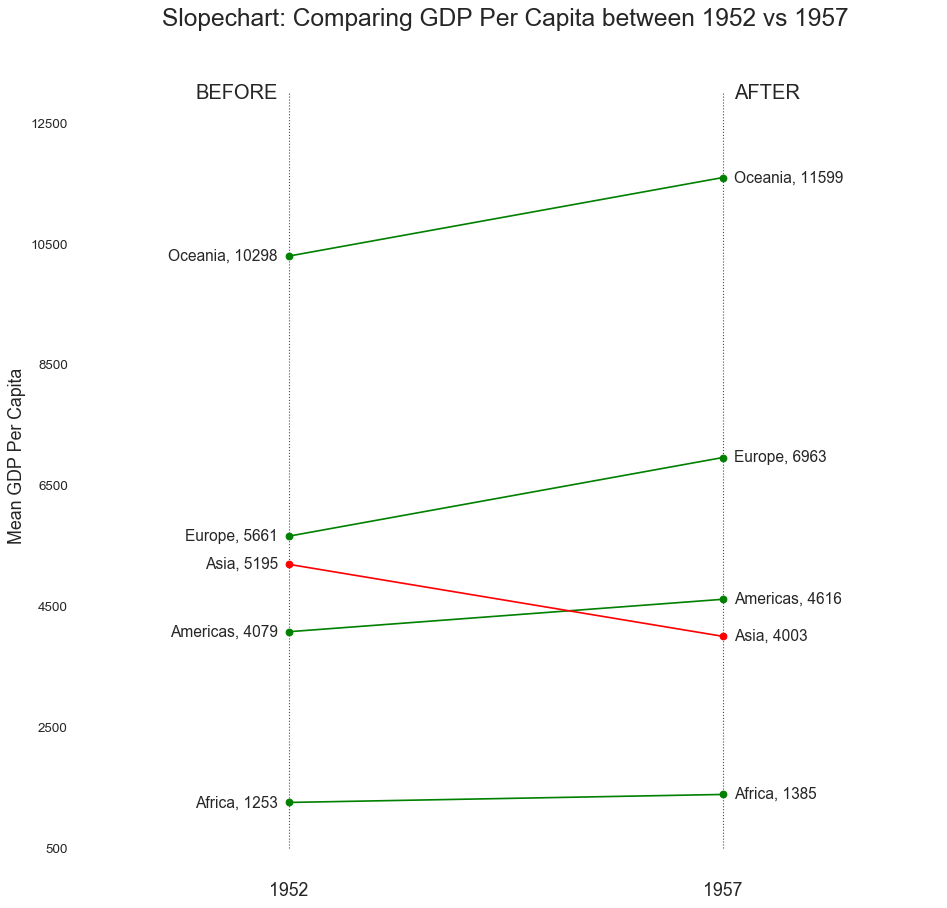

In [12]:
import matplotlib.lines as mlines
# Import Data
# df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/gdppercap.csv")
df = pd.read_csv('data/gdppercap.csv')
left_label = [str(c) + ', '+ str(round(y)) for c, y in zip(df.continent, df['1952'])]
right_label = [str(c) + ', '+ str(round(y)) for c, y in zip(df.continent, df['1957'])]
klass = ['red' if (y1-y2) < 0 else 'green' for y1, y2 in zip(df['1952'], df['1957'])]
# draw line
# https://stackoverflow.com/questions/36470343/how-to-draw-a-line-with-matplotlib/36479941
def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='red' if p1[1]-p2[1] > 0 else 'green', marker='o', markersize=6)
    ax.add_line(l)
    return l
fig, ax = plt.subplots(1,1,figsize=(14,14), dpi= 80)
# Vertical Lines
ax.vlines(x=1, ymin=500, ymax=13000, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=500, ymax=13000, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
# Points
ax.scatter(y=df['1952'], x=np.repeat(1, df.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=df['1957'], x=np.repeat(3, df.shape[0]), s=10, color='black', alpha=0.7)
# Line Segmentsand Annotation
for p1, p2, c in zip(df['1952'], df['1957'], df['continent']):
    newline([1,p1], [3,p2])
    ax.text(1-0.05, p1, c + ', ' + str(round(p1)), horizontalalignment='right', verticalalignment='center', fontdict={'size':14})
    ax.text(3+0.05, p2, c + ', ' + str(round(p2)), horizontalalignment='left', verticalalignment='center', fontdict={'size':14})
# 'Before' and 'After' Annotations
ax.text(1-0.05, 13000, 'BEFORE', horizontalalignment='right', verticalalignment='center', fontdict={'size':18, 'weight':700})
ax.text(3+0.05, 13000, 'AFTER', horizontalalignment='left', verticalalignment='center', fontdict={'size':18, 'weight':700})
# Decoration
ax.set_title("Slopechart: Comparing GDP Per Capita between 1952 vs 1957", fontdict={'size':22})
ax.set(xlim=(0,4), ylim=(0,14000), ylabel='Mean GDP Per Capita')
ax.set_xticks([1,3])
ax.set_xticklabels(["1952", "1957"])
plt.yticks(np.arange(500, 13000, 2000), fontsize=12)
# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.0)
plt.show()